## 期中專題：<br><br>實作MNIST 手寫數字之 CNN 預測，並modify圖片使得AI無法辨認

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

import keras
from keras.datasets import mnist
from keras import optimizers
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Input, Conv2D, Dropout, MaxPooling2D, Activation, Flatten
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

Using Theano backend.


### 先丟資料進來

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [3]:
print ("x_train.shape: "+str(x_train.shape))
print ("x_test.shape: "+str(x_test.shape))
print ("y_train.shape: "+str(y_train.shape))
print ("y_test.shape: "+str(y_test.shape))

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
y_train.shape: (60000,)
y_test.shape: (10000,)


### 看一下圖形長甚麼樣子(不知道是不是 tight_layout 配上 subplot 的 bug ，偶爾會有一張照片出不來...@@)

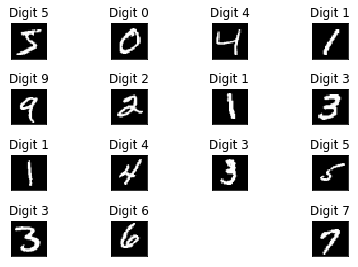

In [4]:
fig = plt.figure()

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X=x_train[i, :, :], cmap='gray', interpolation=None)
    plt.title("Digit {}".format(y_train[i]))
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])


### 將資料 reshape 到適當格式

In [5]:
X = x_train.reshape(len(x_train), 28, 28, 1)
X = X.astype('float32')
X /= 255
print ("X: "+str(X.shape))

X: (60000, 28, 28, 1)


In [6]:
Xt = x_test.reshape(len(x_test), 28, 28, 1)
Xt = Xt.astype('float32')
Xt /= 255
print ("Xt: "+str(Xt.shape))

Xt: (10000, 28, 28, 1)


#### 因為判斷數字屬於分類問題，因此 label需要做 one-hot encoding

In [7]:
cat = 10
Y = np_utils.to_categorical(y_train, cat)
Yt = np_utils.to_categorical(y_test, cat)
print ("Y: "+str(Y.shape))
print ("Yt: "+str(Yt.shape))

Y: (60000, 10)
Yt: (10000, 10)


### 整個 model 的架構

In [8]:
input_img = Input(shape=(28, 28, 1))
model = Sequential()
#model.add(Dense(activation='relu', units=8))
model.add(Conv2D(8, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(rate=0.2))

model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))

model.summary()
model.compile(optimizer = optimizers.Adam(), loss='categorical_crossentropy', metrics=[ 'accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


### 開 Train ！！！！！

In [9]:
model.fit(X, Y, batch_size=128, epochs=20, shuffle=True, validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 16s 330us/step - loss: 0.5640 - acc: 0.8394 - val_loss: 0.2997 - val_acc: 0.9075
Epoch 2/20
48000/48000 [==============================] - 16s 328us/step - loss: 0.3080 - acc: 0.9082 - val_loss: 0.2398 - val_acc: 0.9330
Epoch 3/20
48000/48000 [==============================] - 16s 324us/step - loss: 0.2631 - acc: 0.9224 - val_loss: 0.2075 - val_acc: 0.9404
Epoch 4/20
48000/48000 [==============================] - 15s 322us/step - loss: 0.2249 - acc: 0.9335 - val_loss: 0.1709 - val_acc: 0.9539
Epoch 5/20
48000/48000 [==============================] - 15s 317us/step - loss: 0.1941 - acc: 0.9424 - val_loss: 0.1491 - val_acc: 0.9582
Epoch 6/20
48000/48000 [==============================] - 21s 438us/step - loss: 0.1717 - acc: 0.9477 - val_loss: 0.1317 - val_acc: 0.9631
Epoch 7/20
48000/48000 [==============================] - 15s 311us/step - loss: 0.1540 - acc: 0.9543 - val_loss: 0.

### 將 train 好的 model 拿去判斷 testing data，並把輸出從 one-hot 轉成數字。

In [10]:
result = model.predict(Xt)
print ("result.shape: "+str(result.shape))
ans = result.argmax(1)
print ("ans: "+str(ans))
print ("ans.shape: "+str(ans.shape))

result.shape: (10000, 10)
ans: [7 2 1 ... 4 5 6]
ans.shape: (10000,)


### 把照片和 predict 的值做比較，確實挺準的！！！<br>(當然準阿，資料那麼簡單......)

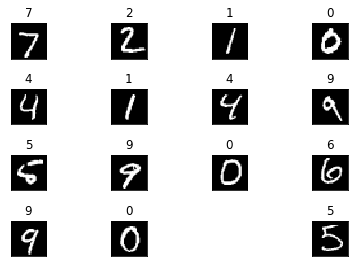

In [11]:
fig = plt.figure()
n=0
#plt.subplot(2, 2, i+1)

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X=Xt[i+n, :, :, 0], cmap='gray', interpolation=None)
    plt.title("{}".format(ans[i+n]))
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])

#plt.imshow(Xt[-2, :, :, 0], cmap='gray')

### 第一種變形：整張圖色碼乘上倍數，顏色深度會不太一樣，對於人眼而言是同樣數字，但AI判斷結果不同。
(右下角的白點是anchor，因為cmap會把值做normalize，因此不設一個白點的話，會看不出顏色有變化。)

Xt = Xt_wrong ? : False


<Figure size 720x720 with 0 Axes>

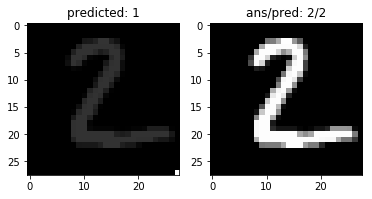

In [35]:
n1=1
Xt_wrong = Xt.copy()
Xt_wrong *= 0.2
Xt_wrong[n1, 27, 27, 0] = 1
result_wrong = model.predict(Xt_wrong)
ans_wrong = result_wrong.argmax(1)

fig = plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(1, 2)
ax[0].imshow(Xt_wrong[n1, :, :, 0], cmap='gray')
ax[0].set_title("predicted: {}".format(str(ans_wrong[n1])))
ax[1].imshow(Xt[n1, :, :, 0], cmap='gray')
ax[1].set_title("ans/pred: {0}/{1}".format(str(y_test[n1]), str(ans[n1])))
print ("Xt = Xt_wrong ? : "+str(np.all(Xt_wrong[n1, :, :, 0] == Xt[n1, :, :, 0])))


## 第二種：等間隔改動其值，圖形在點很多時無法分辨，但對於AI而言是不同的數字。

Xt = Xt_wrong2 ? : False


<Figure size 432x288 with 0 Axes>

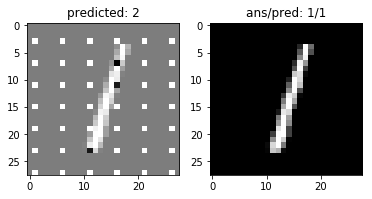

In [36]:
n2 = 2
Xt_wrong2 = Xt.copy()
for i in range(len(Xt_wrong2[n2, :, 0, 0])):
    for j in range(len(Xt_wrong2[n2, 0, :, 0])):
        if (j%5 == 1) & (i%4 == 3):
            Xt_wrong2[n2, i, j, 0] *= -1
            if (Xt_wrong2[n2, i, j, 0] == 0):
                Xt_wrong2[n2, i, j, 0] = 1

result_wrong2 = model.predict(Xt_wrong2)
ans_wrong2 = result_wrong2.argmax(1)

fig = plt.figure()
fig, ax = plt.subplots(1, 2)
ax[0].imshow(Xt_wrong2[n2, :, :, 0], cmap='gray')
ax[0].set_title("predicted: {}".format(str(ans_wrong2[n2])))
ax[1].imshow(Xt[n2, :, :, 0], cmap='gray')
ax[1].set_title("ans/pred: {0}/{1}".format(str(y_test[n2]), str(ans[n2])))
print ("Xt = Xt_wrong2 ? : "+str(np.all(Xt_wrong2[n2, :, :, 0] == Xt[n2, :, :, 0])))


## 第三種，跟第一種很像，反白圖形。

Xt = Xt_wrong3 ? : False


<Figure size 432x288 with 0 Axes>

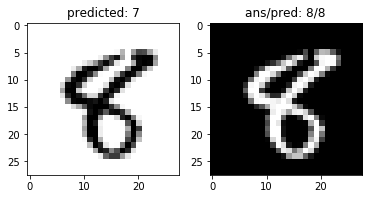

In [37]:
n3 = 84
Xt_wrong3 = Xt.copy()

for i in range(28):
    for j in range(28):
        if (Xt_wrong3[n3, i, j, 0] == 0):
            Xt_wrong3[n3, i, j, 0] == 1
Xt_wrong3[n3, :, :, 0] *= -1

result_wrong3 = model.predict(Xt_wrong3)
ans_wrong3 = result_wrong3.argmax(1)

fig = plt.figure()
fig, ax = plt.subplots(1, 2)
ax[0].imshow(Xt_wrong3[n3, :, :, 0], cmap='gray')
ax[0].set_title("predicted: {}".format(str(ans_wrong3[n3])))
ax[1].imshow(Xt[n3, :, :, 0], cmap='gray')
ax[1].set_title("ans/pred: {0}/{1}".format(str(y_test[n3]), str(ans[n3])))
print ("Xt = Xt_wrong3 ? : "+str(np.all(Xt_wrong3[n3, :, :, 0] == Xt[n3, :, :, 0])))


## 第四種：數字平移過多，造成AI判斷的變化(當然這個其實只要能針對數字做bounding box的話應該很好解決)。

Xt = Xt_wrong4 ? : False


<Figure size 432x288 with 0 Axes>

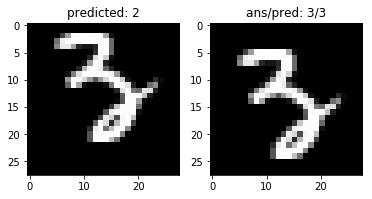

In [38]:
n4 = 87
Xt_wrong4 = Xt.copy()

for i in range(25):
    for j in range(28):
        Xt_wrong4[n4, i, j, 0] = Xt_wrong4[n4, i+3, j, 0] 

result_wrong4 = model.predict(Xt_wrong4)
ans_wrong4 = result_wrong4.argmax(1)

fig = plt.figure()
fig, ax = plt.subplots(1, 2)
ax[0].imshow(Xt_wrong4[n4, :, :, 0], cmap='gray')
ax[0].set_title("predicted: {}".format(str(ans_wrong4[n4])))
ax[1].imshow(Xt[n4, :, :, 0], cmap='gray')
ax[1].set_title("ans/pred: {0}/{1}".format(str(y_test[n4]), str(ans[n4])))
print ("Xt = Xt_wrong4 ? : "+str(np.all(Xt_wrong4[n4, :, :, 0] == Xt[n4, :, :, 0])))

### 圖片本身有條狀汙損(?)，本質上和第二種有點類似。

Xt = Xt_wrong5 ? : False


<Figure size 432x288 with 0 Axes>

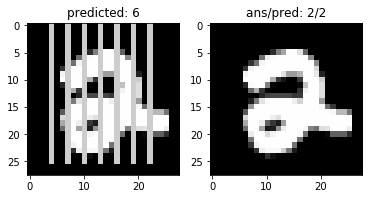

In [68]:
n5 = 222
Xt_wrong5 = Xt.copy()

for i in range(26):
    for j in range(20):
        if (j%3==1):
            Xt_wrong5[n5, i, 3+j, 0]=0.8

        
result_wrong5 = model.predict(Xt_wrong5)
ans_wrong5 = result_wrong5.argmax(1)

fig = plt.figure()
fig, ax = plt.subplots(1, 2)
ax[0].imshow(Xt_wrong5[n5, :, :, 0], cmap='gray')
ax[0].set_title("predicted: {}".format(str(ans_wrong5[n5])))
ax[1].imshow(Xt[n5, :, :, 0], cmap='gray')
ax[1].set_title("ans/pred: {0}/{1}".format(str(y_test[n5]), str(ans[n5])))
print ("Xt = Xt_wrong5 ? : "+str(np.all(Xt_wrong5[n5, :, :, 0] == Xt[n5, :, :, 0])))


## 之所以做這些測試是因為想到很多網站進行驗證時所使用的驗證碼，幾乎都是一些極度扭曲的數字，不知道我大AI能否破解這些照片？